In [1]:
!pip install jcopdl==1.1.1
!pip install --upgrade --no-cache-dir gdown

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nv

# Dataset

In [75]:
# Train 70
# WidthxHeight 224x224

!gdown https://drive.google.com/uc?id=1cvCvYNgvexbqlpisiZ3Nb7iYZdXiOfPM

Downloading...
From: https://drive.google.com/uc?id=1cvCvYNgvexbqlpisiZ3Nb7iYZdXiOfPM
To: /content/Dataset_train_70_width_224.zip
100% 5.79M/5.79M [00:00<00:00, 174MB/s]


In [ ]:
# Train 70
# WidthxHeight 4000x3000

!gdown https://drive.google.com/uc?id=1B3_20alWyeBjXuqGSYcIzSvcD0cEpYlD

In [55]:
# No Augmentation
# Train 70
# WidthxHeight 224x224

!gdown https://drive.google.com/uc?id=1uFBtiud6NWNgj1uynq7dnI0qjMw5wQWn

Downloading...
From: https://drive.google.com/uc?id=1uFBtiud6NWNgj1uynq7dnI0qjMw5wQWn
To: /content/Dataset_no_augment_train_70_w_224.zip
100% 2.38M/2.38M [00:00<00:00, 152MB/s]


In [77]:
!unzip /content/Dataset_train_70_width_224.zip

Archive:  /content/Dataset_train_70_width_224.zip
  inflating: INFO.txt                
   creating: test/
   creating: test/busuk/
  inflating: test/busuk/busuk_0.jpg  
  inflating: test/busuk/busuk_1.jpg  
  inflating: test/busuk/busuk_10.jpg  
  inflating: test/busuk/busuk_11.jpg  
  inflating: test/busuk/busuk_12.jpg  
  inflating: test/busuk/busuk_13.jpg  
  inflating: test/busuk/busuk_14.jpg  
  inflating: test/busuk/busuk_15.jpg  
  inflating: test/busuk/busuk_16.jpg  
  inflating: test/busuk/busuk_17.jpg  
  inflating: test/busuk/busuk_2.jpg  
  inflating: test/busuk/busuk_3.jpg  
  inflating: test/busuk/busuk_4.jpg  
  inflating: test/busuk/busuk_5.jpg  
  inflating: test/busuk/busuk_6.jpg  
  inflating: test/busuk/busuk_7.jpg  
  inflating: test/busuk/busuk_8.jpg  
  inflating: test/busuk/busuk_9.jpg  
   creating: test/normal-busuk/
  inflating: test/normal-busuk/normal-busuk_0.jpg  
  inflating: test/normal-busuk/normal-busuk_1.jpg  
  inflating: test/normal-busuk/normal-bu

# Import Package

In [78]:
import jcopdl
jcopdl.__version__

'1.1.1'

In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [81]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [82]:
bs = 64
crop_size = 224

train_transform = transforms.Compose([
    # transforms.RandomRotation(15),
    # transforms.RandomHorizontalFlip(),
    # transforms.Resize(226),
    # transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    # transforms.Resize(226),
    # transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = datasets.ImageFolder("/content/train", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=0)

test_set = datasets.ImageFolder("/content/test", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [83]:
print(len(test_set.targets))
print(test_set.targets)

82
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [84]:
img, label = train_set[0]
print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[-1.5185, -1.5357, -1.5699,  ..., -2.1008, -2.1008, -2.1008],
         [-1.5357, -1.5528, -1.5699,  ..., -2.1008, -2.1008, -2.1008],
         [-1.5699, -1.5699, -1.5870,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -1.7069, -1.7240, -1.7412],
         [-2.1179, -2.1179, -2.1179,  ..., -1.7069, -1.7240, -1.7412],
         [-2.1179, -2.1179, -2.1179,  ..., -1.6898, -1.7240, -1.7240]],

        [[-1.3179, -1.3354, -1.3704,  ..., -2.0357, -2.0357, -2.0357],
         [-1.3354, -1.3529, -1.3704,  ..., -2.0357, -2.0357, -2.0357],
         [-1.3704, -1.3704, -1.3880,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -1.6155, -1.6331, -1.6506],
         [-2.0357, -2.0357, -2.0357,  ..., -1.6155, -1.6331, -1.6506],
         [-2.0357, -2.0357, -2.0357,  ..., -1.5980, -1.6331, -1.6331]],

        [[-1.0898, -1.1073, -1.1421,  ..., -1.8044, -1.8044, -1.8044],
         [-1.1073, -1.1247, -1.1421,  ..., -1

In [85]:
feature, target = next(iter(trainloader))
feature.shape

torch.Size([64, 3, 224, 224])

In [86]:
label2cat = train_set.classes
label2cat

['busuk', 'normal-busuk', 'sangat-segar', 'segar-normal']

# MOBILENET

In [87]:
mobilenet_large_output_features = 960
mobilenet_small_output_features = 576

from torchvision.models import mobilenet_v3_large, MobileNet_V3_Large_Weights
class CustomMobilenetV3(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v3_large(weights=MobileNet_V3_Large_Weights.DEFAULT)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(mobilenet_large_output_features, output_size),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        return self.mnet(x)

    def freeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = False

    def unfreeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = True

In [68]:
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

class CustomMobilenetV2(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(1280, output_size),
            nn.LogSoftmax()
        )

    def forward(self, x):
        return self.mnet(x)

    def freeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = False

    def unfreeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = True

# CUSTOM CNN

In [ ]:
from jcopdl.layers import conv_block, linear_block

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            # CNN Layer 1
            nn.Conv2d(3, 8, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # CNN Layer 2
            nn.Conv2d(8, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # CNN Layer 3
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # CNN Layer 4
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten()
        )

        self.fc = nn.Sequential(
            linear_block(12544, 256, dropout=0.1),
            linear_block(256, 4, activation='lsoftmax'),
        )


    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

# Training Preparation

In [88]:
config = set_config({
    "output_size": len(train_set.classes),
    "batch_size": bs,
    "crop_size": crop_size,
})

In [89]:
model = CustomMobilenetV3(config.output_size).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, early_stop_patience=5, outdir="model")

In [90]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 1.2530 | Test_cost  = 1.3564 | Train_score = 0.5134 | Test_score = 0.2683 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.9433 | Test_cost  = 1.3838 | Train_score = 0.8281 | Test_score = 0.3049 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.7424 | Test_cost  = 1.4433 | Train_score = 0.8595 | Test_score = 0.3293 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.6217 | Test_cost  = 1.3794 | Train_score = 0.9001 | Test_score = 0.3415 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.5357 | Test_cost  = 1.2785 | Train_score = 0.9094 | Test_score = 0.3659 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.4722 | Test_cost  = 1.1614 | Train_score = 0.9117 | Test_score = 0.3780 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.4266 | Test_cost  = 0.9727 | Train_score = 0.9257 | Test_score = 0.4756 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.3840 | Test_cost  = 0.8558 | Train_score = 0.9373 | Test_score = 0.5610 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.3484 | Test_cost  = 0.7363 | Train_score = 0.9489 | Test_score = 0.6585 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.3273 | Test_cost  = 0.6262 | Train_score = 0.9454 | Test_score = 0.7073 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.3063 | Test_cost  = 0.5751 | Train_score = 0.9454 | Test_score = 0.7683 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.2804 | Test_cost  = 0.4967 | Train_score = 0.9547 | Test_score = 0.8415 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.2723 | Test_cost  = 0.4442 | Train_score = 0.9663 | Test_score = 0.8780 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.2465 | Test_cost  = 0.4295 | Train_score = 0.9628 | Test_score = 0.8415 |
==> EarlyStop patience =  1 | Best test_score: 0.8780


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.2393 | Test_cost  = 0.3955 | Train_score = 0.9628 | Test_score = 0.9024 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.2288 | Test_cost  = 0.3694 | Train_score = 0.9721 | Test_score = 0.8902 |
==> EarlyStop patience =  1 | Best test_score: 0.9024


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.2100 | Test_cost  = 0.3404 | Train_score = 0.9663 | Test_score = 0.9024 |
==> EarlyStop patience =  2 | Best test_score: 0.9024


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.2022 | Test_cost  = 0.3319 | Train_score = 0.9744 | Test_score = 0.8780 |
==> EarlyStop patience =  3 | Best test_score: 0.9024


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.1920 | Test_cost  = 0.2981 | Train_score = 0.9744 | Test_score = 0.8902 |
==> EarlyStop patience =  4 | Best test_score: 0.9024


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.1832 | Test_cost  = 0.2839 | Train_score = 0.9803 | Test_score = 0.9024 |


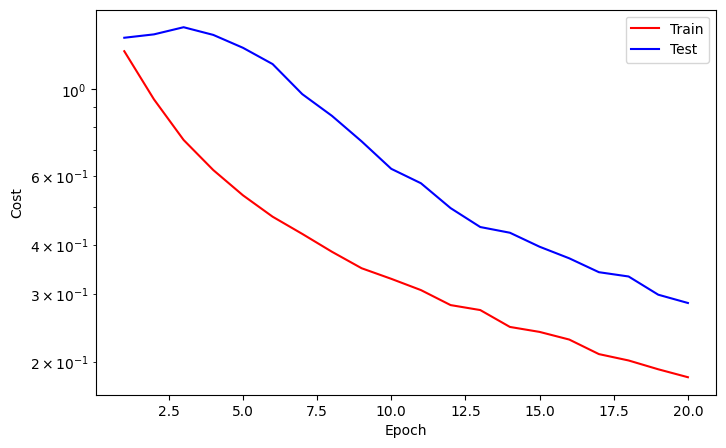

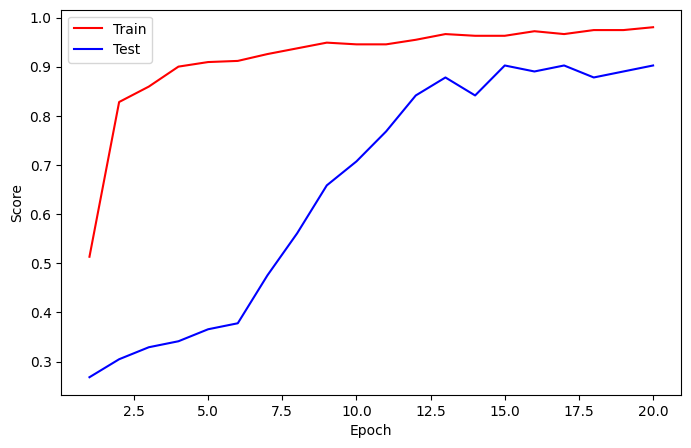

==> EarlyStop patience =  5 | Best test_score: 0.9024
==> Execute Early Stopping at epoch: 20 | Best test_score: 0.9024
==> Best model is saved at model


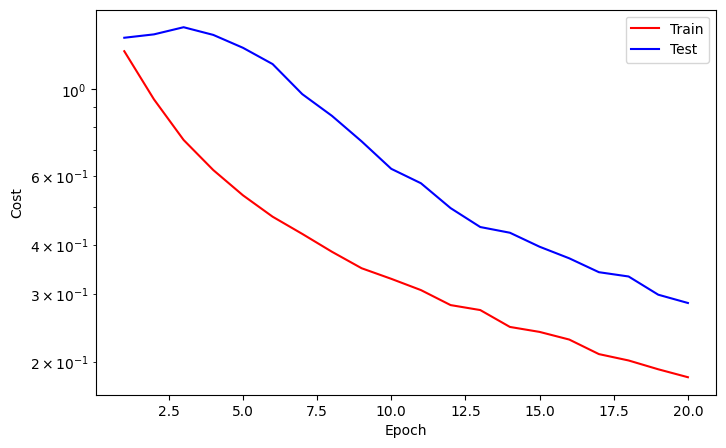

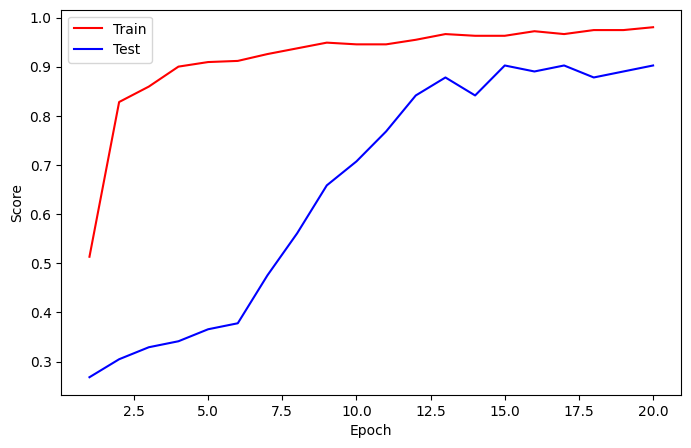

In [91]:
while True:
    train_cost, train_score = loop_fn(
        "train", train_set, trainloader,
        model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn(
            "test", test_set, testloader,
            model, criterion, optimizer, device)

    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [92]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

callback.reset_early_stop()
callback.early_stop_patience = 10

Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.2120 | Test_cost  = 0.3323 | Train_score = 0.9675 | Test_score = 0.9024 |
==> EarlyStop patience =  1 | Best test_score: 0.9024


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.1662 | Test_cost  = 0.2954 | Train_score = 0.9849 | Test_score = 0.8902 |
==> EarlyStop patience =  2 | Best test_score: 0.9024


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.1419 | Test_cost  = 0.2623 | Train_score = 0.9861 | Test_score = 0.9146 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.1206 | Test_cost  = 0.2366 | Train_score = 0.9907 | Test_score = 0.9146 |
==> EarlyStop patience =  1 | Best test_score: 0.9146


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.1031 | Test_cost  = 0.2108 | Train_score = 0.9895 | Test_score = 0.9146 |
==> EarlyStop patience =  2 | Best test_score: 0.9146


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.0802 | Test_cost  = 0.1900 | Train_score = 0.9977 | Test_score = 0.9146 |
==> EarlyStop patience =  3 | Best test_score: 0.9146


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.0720 | Test_cost  = 0.1740 | Train_score = 0.9977 | Test_score = 0.9268 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.0620 | Test_cost  = 0.1592 | Train_score = 0.9988 | Test_score = 0.9512 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.0494 | Test_cost  = 0.1465 | Train_score = 0.9988 | Test_score = 0.9512 |
==> EarlyStop patience =  1 | Best test_score: 0.9512


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.0434 | Test_cost  = 0.1335 | Train_score = 0.9988 | Test_score = 0.9512 |
==> EarlyStop patience =  2 | Best test_score: 0.9512


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 0.0411 | Test_cost  = 0.1234 | Train_score = 1.0000 | Test_score = 0.9512 |
==> EarlyStop patience =  3 | Best test_score: 0.9512


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    32
Train_cost  = 0.0373 | Test_cost  = 0.1129 | Train_score = 1.0000 | Test_score = 0.9634 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    33
Train_cost  = 0.0290 | Test_cost  = 0.1046 | Train_score = 1.0000 | Test_score = 0.9634 |
==> EarlyStop patience =  1 | Best test_score: 0.9634


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    34
Train_cost  = 0.0270 | Test_cost  = 0.0976 | Train_score = 1.0000 | Test_score = 0.9756 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    35
Train_cost  = 0.0261 | Test_cost  = 0.0914 | Train_score = 1.0000 | Test_score = 0.9756 |
==> EarlyStop patience =  1 | Best test_score: 0.9756


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    36
Train_cost  = 0.0228 | Test_cost  = 0.0850 | Train_score = 1.0000 | Test_score = 0.9878 |


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    37
Train_cost  = 0.0206 | Test_cost  = 0.0796 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  1 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    38
Train_cost  = 0.0192 | Test_cost  = 0.0765 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  2 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    39
Train_cost  = 0.0179 | Test_cost  = 0.0729 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  3 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    40
Train_cost  = 0.0162 | Test_cost  = 0.0686 | Train_score = 1.0000 | Test_score = 0.9878 |


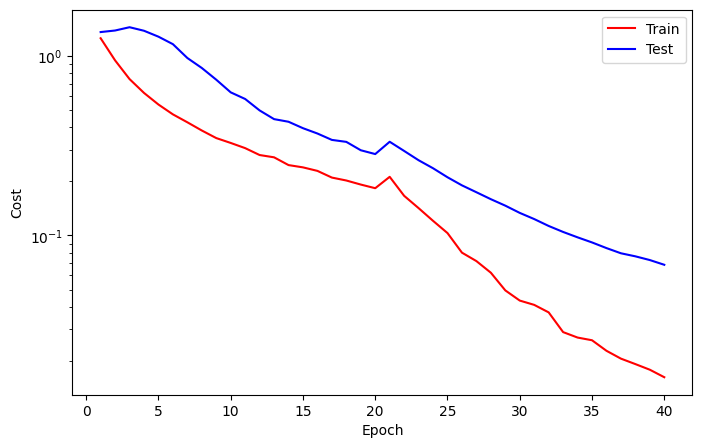

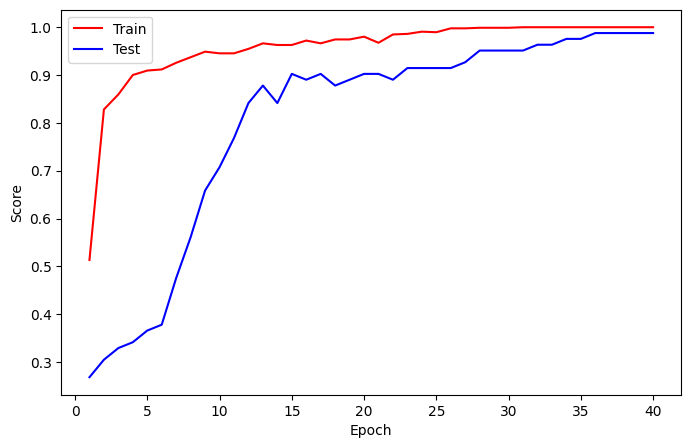

==> EarlyStop patience =  4 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    41
Train_cost  = 0.0128 | Test_cost  = 0.0659 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  5 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    42
Train_cost  = 0.0120 | Test_cost  = 0.0636 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  6 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    43
Train_cost  = 0.0107 | Test_cost  = 0.0613 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  7 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    44
Train_cost  = 0.0110 | Test_cost  = 0.0596 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  8 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    45
Train_cost  = 0.0103 | Test_cost  = 0.0576 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience =  9 | Best test_score: 0.9878


Train:   0%|          | 0/14 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    46
Train_cost  = 0.0083 | Test_cost  = 0.0560 | Train_score = 1.0000 | Test_score = 0.9878 |
==> EarlyStop patience = 10 | Best test_score: 0.9878
==> Execute Early Stopping at epoch: 46 | Best test_score: 0.9878
==> Best model is saved at model


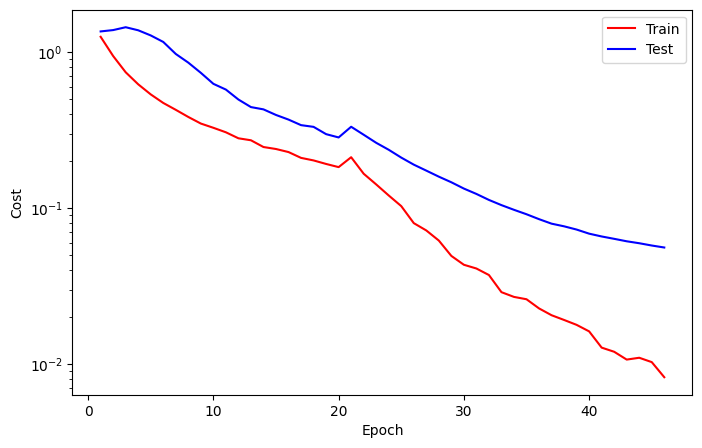

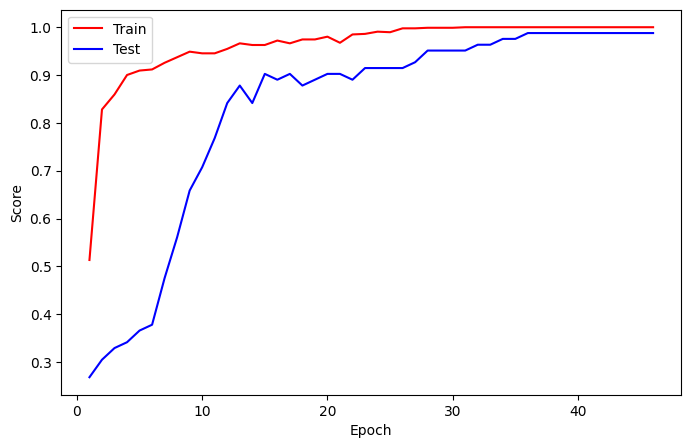

In [93]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [94]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/configs.pth (deflated 58%)
  adding: content/model/weights_50.pth (deflated 8%)
  adding: content/model/weights_best.pth (deflated 8%)
  adding: content/model/logs.pth (deflated 39%)


# Predict All Images

In [95]:
output_size = 4

# Load Model
model = CustomMobilenetV3(output_size).to(device)
weights = torch.load("/content/model/weights_best.pth", map_location='cpu')
model.load_state_dict(weights)

<All keys matched successfully>

In [96]:
bs = 64
crop_size = 224

validation_transform = transforms.Compose([
    # transforms.Resize(226),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

validation_set = datasets.ImageFolder("/content/validation", transform=validation_transform)
validationloader = DataLoader(validation_set, batch_size=len(validation_set), shuffle=True)

feature, target = next(iter(validationloader))
feature, target = feature.to(device), target.to(device)
len(feature)

41

In [97]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
# [label2cat[pred] for pred in preds]
preds

len(target)

41

In [98]:
(target  == preds).to(torch.float32).mean()

tensor(0.9756, device='cuda:0')

In [99]:
def inverse_norm(img):
    img[0, :, :] = img[0, :, :] * 0.229 + 485
    img[1, :, :] = img[1, :, :] * 0.224 + 456
    img[2, :, :] = img[2, :, :] * 0.225 + 406

In [100]:
label2cat = validation_set.classes
label2cat

['busuk', 'normal-busuk', 'sangat-segar', 'segar-normal']

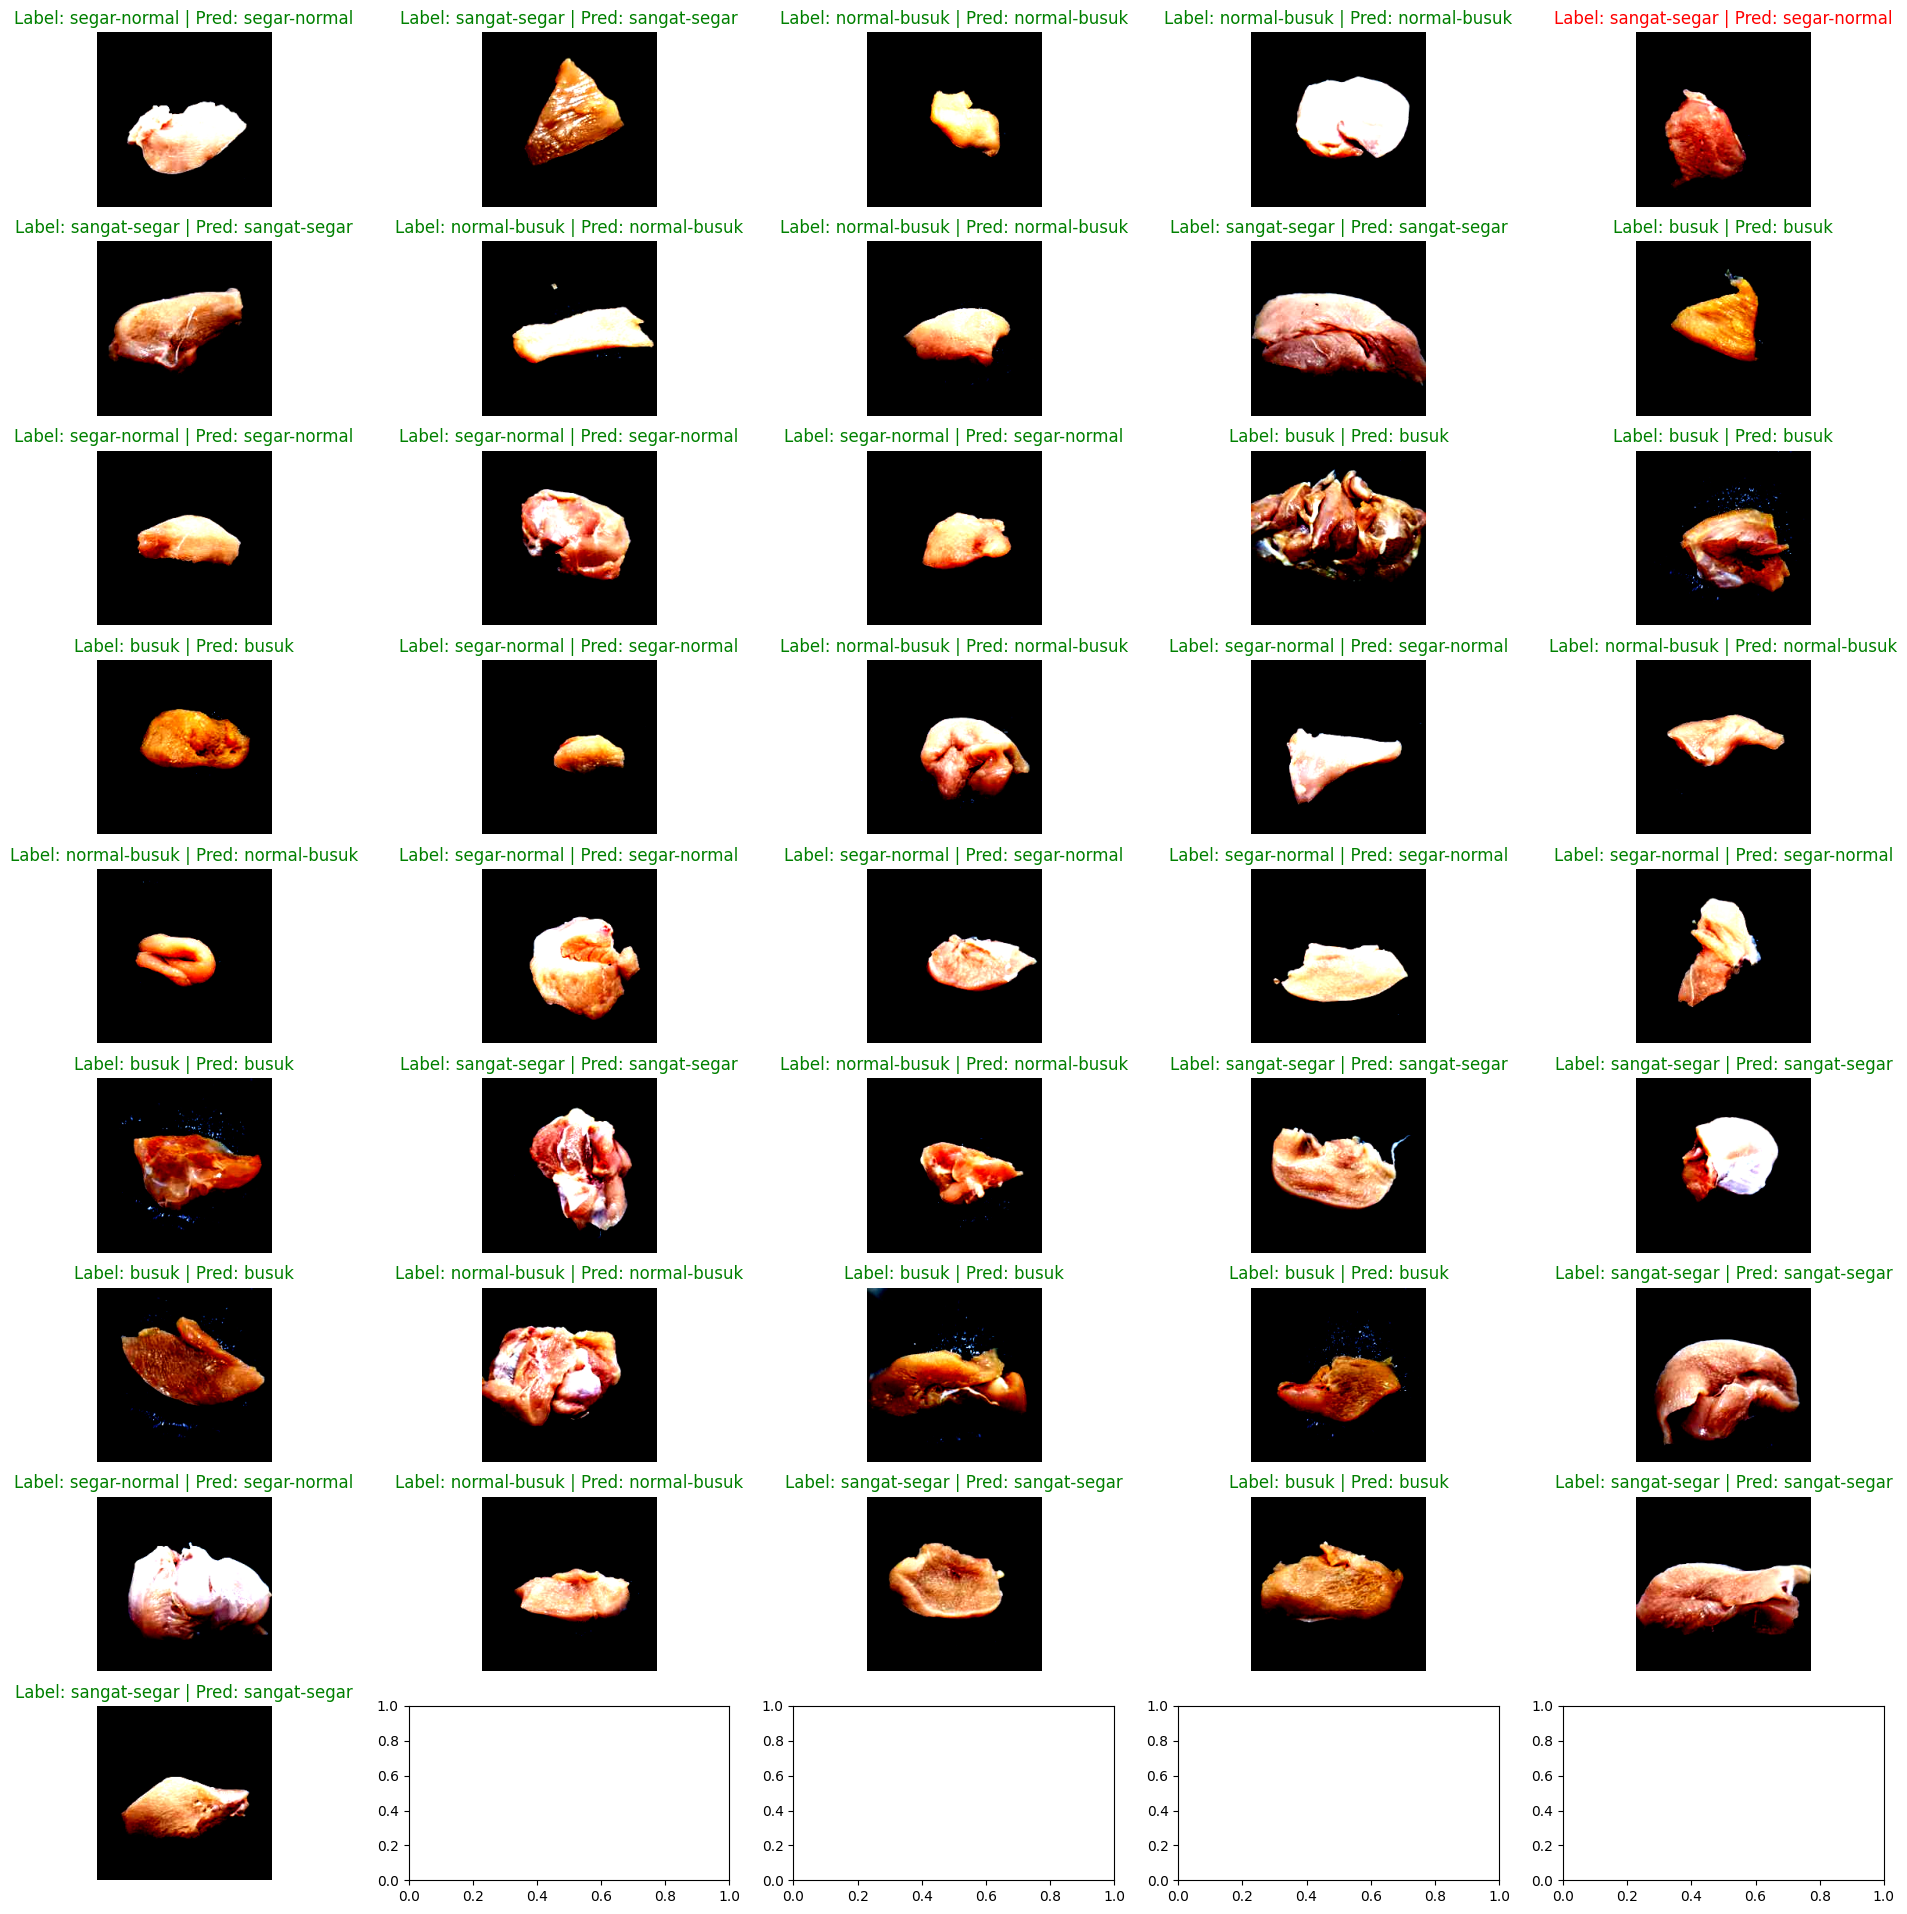

In [101]:
fig, axes = plt.subplots(9, 5, figsize=(24, 24))
for img, label, pred, ax, in zip(feature, target, preds, axes.flatten()):
    ax.imshow(img.permute(1, 2, 0).cpu())
    font = {"color": "r"} if label != pred else {"color": "g"}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font)
    ax.axis('off')

In [102]:
y = target.cpu()
y_preds = preds.cpu()

y

tensor([3, 2, 1, 1, 2, 2, 1, 1, 2, 0, 3, 3, 3, 0, 0, 0, 3, 1, 3, 1, 1, 3, 3, 3,
        3, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 3, 1, 2, 0, 2, 2])

In [103]:
y[y==2] = 4
y[y==3] = 2
y[y==4] = 3

y_preds[y_preds==2] = 4
y_preds[y_preds==3] = 2
y_preds[y_preds==4] = 3

y

tensor([2, 3, 1, 1, 3, 3, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
        2, 0, 3, 1, 3, 3, 0, 1, 0, 0, 3, 2, 1, 3, 0, 3, 3])

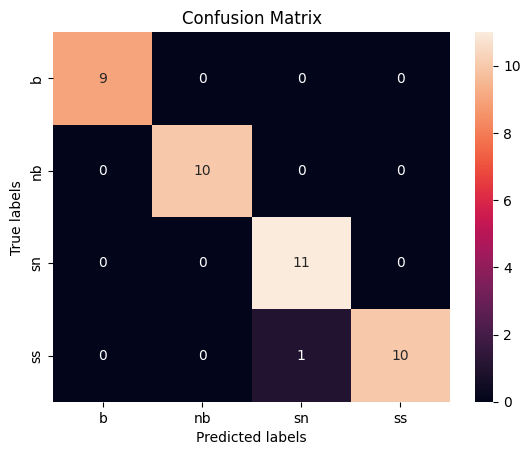

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['b', 'nb', 'sn', 'ss']); ax.yaxis.set_ticklabels(['b', 'nb', 'sn', 'ss']);

In [105]:
from sklearn.metrics import classification_report
import pandas as pd
print (classification_report(y, y_preds))

report = classification_report(y, y_preds, output_dict=True)
df = pd.DataFrame(report).transpose()
df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        11
           3       1.00      0.91      0.95        11

    accuracy                           0.98        41
   macro avg       0.98      0.98      0.98        41
weighted avg       0.98      0.98      0.98        41



,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,9.00000
1,1.000000,1.000000,1.000000,10.00000
2,0.916667,1.000000,0.956522,11.00000
3,1.000000,0.909091,0.952381,11.00000
accuracy,0.975610,0.975610,0.975610,0.97561
macro avg,0.979167,0.977273,0.977226,41.00000
weighted avg,0.977642,0.975610,0.975559,41.00000


# Predict Single Image

In [110]:
import torch
from torch import nn
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision import transforms
import numpy as np
from PIL import Image
import os

In [106]:
output_size = 4

# Load Model
model = CustomMobilenetV3(output_size).to(device)
weights = torch.load("/content/model/weights_best.pth", map_location='cpu')
model.load_state_dict(weights)

<All keys matched successfully>

In [107]:
def pred_image(image_path,model):
   img = Image.open(image_path)
   transform_norm = transforms.Compose([
    #    transforms.Resize(226),
    #    transforms.CenterCrop(224),
       transforms.ToTensor(),
       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
   # get normalized image
   img_normalized = transform_norm(img).float()
   img_normalized = img_normalized.unsqueeze_(0)
   # input = Variable(image_tensor)
   img_normalized = img_normalized.to(device)
   # print(img_normalized.shape)
   with torch.no_grad():
      model.eval()
      output = model(img_normalized)
     # print(output)
      index = output.data.cpu().numpy().argmax()
     #   classes = train_set.classes
      classes = label2cat
      class_name = classes[index]
      return class_name

In [108]:
label2cat = ['busuk', 'normal-busuk', 'sangat-segar', 'segar-normal']

['busuk', 'normal-busuk', 'sangat-segar', 'segar-normal']

In [112]:
path = '/content/validation/busuk/'

for image_path in os.listdir(path):
  predict_class = pred_image(f"{path}{image_path}", model)
  if predict_class != "busuk":
    print(f"{image_path}: predicted as {predict_class}")